Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

Reading the dataset

In [2]:
df = pd.read_csv(r"D:\Ausaaf\1st sem\python\ALLIMPORTS\EurosFinal2024-Spain v England.csv")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,eventId,minute,second,teamId,x,y,expandedMinute,...,start_zone_value_xT,end_zone_value_xT,xT,teamName,shirtNo,name,position,isFirstEleven,pro,shortName
0,0,0,2.701068e+09,2,0,0.0,338,0.000,0.000,0,...,NaN,NaN,NaN,Spain,NaN,NaN,NaN,NaN,0.000000,NaN
1,1,1,2.701068e+09,2,0,0.0,345,0.000,0.000,0,...,NaN,NaN,NaN,England,NaN,NaN,NaN,NaN,0.000000,NaN
2,2,2,2.701068e+09,3,0,0.0,345,52.500,34.000,0,...,-0.016895,0.011324,-0.005572,England,26.0,Kobbie Mainoo,DMC,True,-24.170388,K. Mainoo
3,3,3,2.701068e+09,4,0,4.0,345,29.505,38.556,0,...,NaN,NaN,NaN,England,1.0,Jordan Pickford,GK,True,0.000000,J. Pickford
4,4,4,2.701068e+09,4,0,33.0,338,5.250,37.332,0,...,0.009411,0.008880,-0.000531,Spain,23.0,Unai Simón,GK,True,0.000000,U. Simón


Dropping unecessary columns

In [4]:
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

Data overview


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1383 non-null   float64
 1   eventId               1383 non-null   int64  
 2   minute                1383 non-null   int64  
 3   second                1382 non-null   float64
 4   teamId                1383 non-null   int64  
 5   x                     1383 non-null   float64
 6   y                     1383 non-null   float64
 7   expandedMinute        1383 non-null   int64  
 8   period                1383 non-null   object 
 9   type                  1383 non-null   object 
 10  outcomeType           1383 non-null   object 
 11  qualifiers            1383 non-null   object 
 12  satisfiedEventsTypes  1383 non-null   object 
 13  isTouch               1383 non-null   bool   
 14  playerId              1367 non-null   float64
 15  endX                 

Checking for NaN values

In [6]:
df.isnull().sum()

id                         0
eventId                    0
minute                     0
second                     1
teamId                     0
x                          0
y                          0
expandedMinute             0
period                     0
type                       0
outcomeType                0
qualifiers                 0
satisfiedEventsTypes       0
isTouch                    0
playerId                  16
endX                     428
endY                     428
blockedX                1367
blockedY                1367
goalMouthZ              1358
goalMouthY              1358
isShot                  1358
relatedEventId          1342
relatedPlayerId         1342
cardType_x              1379
isGoal_x                1380
cardType_y              1383
isGoal_y                1383
x1_bin_xT                656
y1_bin_xT                656
x2_bin_xT                656
y2_bin_xT                656
start_zone_value_xT      656
end_zone_value_xT        656
xT            

Dropping these columns as they have many missing values

In [7]:
df = df.dropna(subset=['teamName', 'position'])

Convert columns to appropriate data types


In [8]:
df['minute'] = df['minute'].fillna(0).astype(int)
df['second'] = df['second'].fillna(0).astype(int)

Check for any remaining missing values

In [9]:
print(df.isnull().sum())

id                         0
eventId                    0
minute                     0
second                     0
teamId                     0
x                          0
y                          0
expandedMinute             0
period                     0
type                       0
outcomeType                0
qualifiers                 0
satisfiedEventsTypes       0
isTouch                    0
playerId                   0
endX                     412
endY                     412
blockedX                1351
blockedY                1351
goalMouthZ              1342
goalMouthY              1342
isShot                  1342
relatedEventId          1326
relatedPlayerId         1326
cardType_x              1363
isGoal_x                1364
cardType_y              1367
isGoal_y                1367
x1_bin_xT                640
y1_bin_xT                640
x2_bin_xT                640
y2_bin_xT                640
start_zone_value_xT      640
end_zone_value_xT        640
xT            

Data Overview


In [10]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 2 to 1376
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1367 non-null   float64
 1   eventId               1367 non-null   int64  
 2   minute                1367 non-null   int32  
 3   second                1367 non-null   int32  
 4   teamId                1367 non-null   int64  
 5   x                     1367 non-null   float64
 6   y                     1367 non-null   float64
 7   expandedMinute        1367 non-null   int64  
 8   period                1367 non-null   object 
 9   type                  1367 non-null   object 
 10  outcomeType           1367 non-null   object 
 11  qualifiers            1367 non-null   object 
 12  satisfiedEventsTypes  1367 non-null   object 
 13  isTouch               1367 non-null   bool   
 14  playerId              1367 non-null   float64
 15  endX                 

In [11]:
df[['start_zone_value_xT', 'end_zone_value_xT', 'xT']].describe()


,start_zone_value_xT,end_zone_value_xT,xT
count,727.000000,727.000000,727.000000
mean,0.006182,0.018661,0.001185
std,0.020744,0.017575,0.014425
min,-0.257454,0.006383,-0.149403
25%,-0.010595,0.011105,-0.001587
50%,0.011263,0.014736,0.000000
75%,0.018703,0.021221,0.001698
max,0.108051,0.257454,0.227921


In [12]:
df.corr()

C:\Users\Sneha\AppData\Local\Temp\ipykernel_1568\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,eventId,minute,second,teamId,x,y,expandedMinute,isTouch,playerId,...,isGoal_y,x1_bin_xT,y1_bin_xT,x2_bin_xT,y2_bin_xT,start_zone_value_xT,end_zone_value_xT,xT,shirtNo,pro
id,1.000000,0.511296,0.639007,0.044344,0.056891,0.024676,-0.019029,0.638944,-0.044111,0.064710,...,NaN,0.068175,-0.026853,0.083151,-0.017236,-0.057492,0.095275,0.033347,0.053891,-0.003386
eventId,0.511296,1.000000,0.585421,-0.013883,-0.179262,0.050555,-0.019688,0.585472,-0.059304,0.091560,...,NaN,0.097268,0.004458,0.108241,0.009838,0.188719,0.099584,0.043369,0.125154,-0.000288
minute,0.639007,0.585421,1.000000,0.009177,0.050281,0.014638,-0.034944,0.999815,-0.017778,0.045525,...,NaN,0.070338,-0.030584,0.087690,-0.022175,-0.056021,0.096624,0.034657,0.063074,-0.001212
second,0.044344,-0.013883,0.009177,1.000000,-0.016674,-0.016002,-0.031796,0.008889,0.018819,0.010388,...,NaN,-0.013052,-0.042386,0.006903,-0.065591,0.065588,-0.018629,0.024715,-0.016619,0.010925
teamId,0.056891,-0.179262,0.050281,-0.016674,1.000000,-0.143785,-0.025382,0.050579,-0.058801,-0.119519,...,NaN,-0.104002,-0.096784,-0.078752,-0.088400,-0.788551,-0.019323,-0.023260,-0.307842,-0.002759
x,0.024676,0.050555,0.014638,-0.016002,-0.143785,1.000000,0.049387,0.013970,0.095160,0.214397,...,NaN,0.994769,0.021717,0.854411,0.044917,0.146429,0.494703,0.061714,0.131057,0.025109
y,-0.019029,-0.019688,-0.034944,-0.031796,-0.025382,0.049387,1.000000,-0.034572,0.023937,0.138907,...,NaN,0.034398,0.991986,0.027478,0.672399,0.088004,-0.007487,-0.001484,0.268387,0.008185
expandedMinute,0.638944,0.585472,0.999815,0.008889,0.050579,0.013970,-0.034572,1.000000,-0.016718,0.045746,...,NaN,0.068728,-0.029763,0.085568,-0.021117,-0.057954,0.095321,0.034318,0.062174,-0.001615
isTouch,-0.044111,-0.059304,-0.017778,0.018819,-0.058801,0.095160,0.023937,-0.016718,1.000000,-0.015178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000141,0.014124
playerId,0.064710,0.091560,0.045525,0.010388,-0.119519,0.214397,0.138907,0.045746,-0.015178,1.000000,...,NaN,0.174629,0.078388,0.116293,0.060803,0.077233,0.099364,0.005781,0.531795,-0.054170


Plot event timing

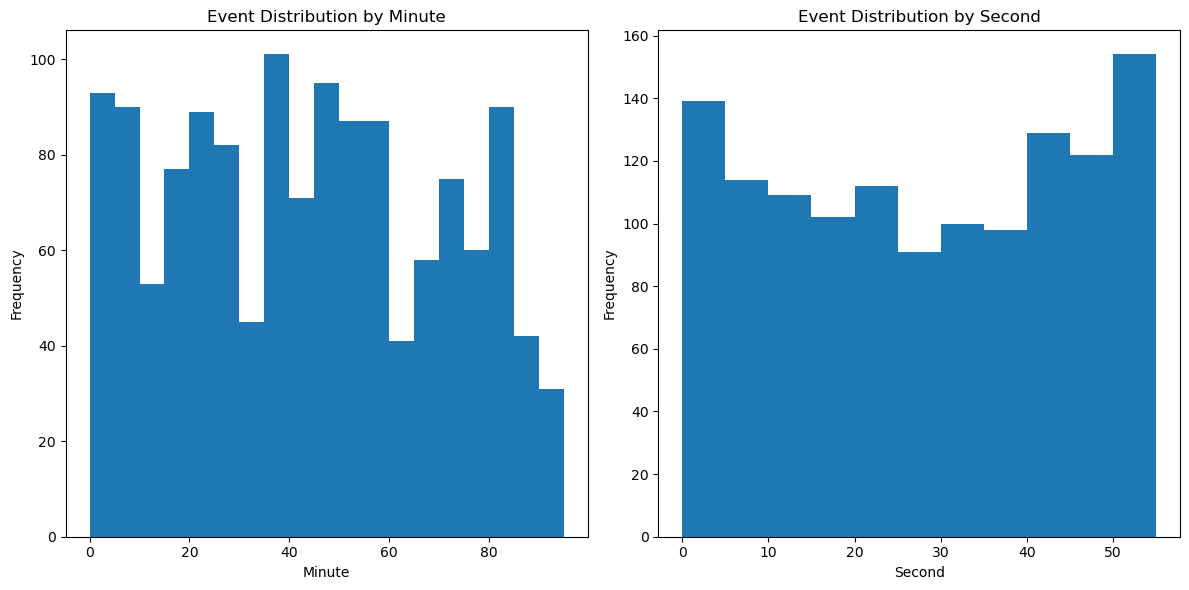

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['minute'], bins=range(0, 100, 5))
plt.title('Event Distribution by Minute')
plt.xlabel('Minute')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['second'], bins=range(0, 60, 5))
plt.title('Event Distribution by Second')
plt.xlabel('Second')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Distribution of xT


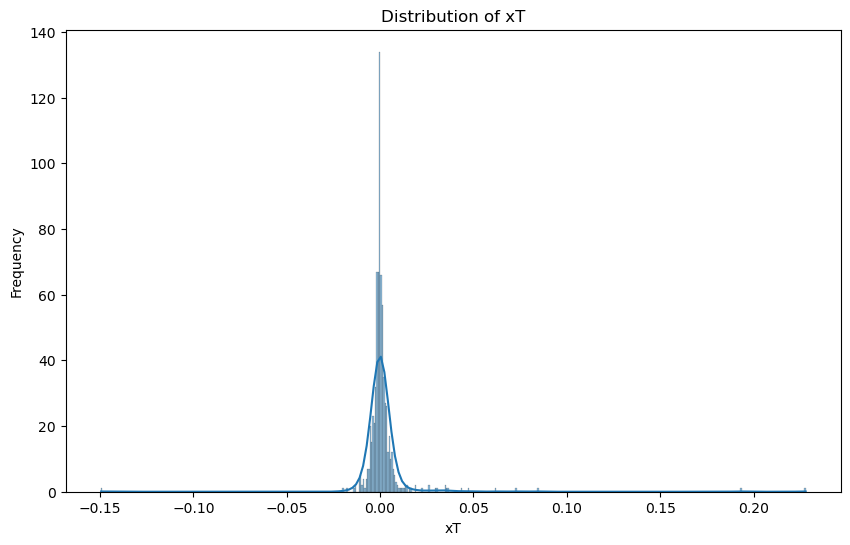

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['xT'].dropna(), kde=True)
plt.title('Distribution of xT')
plt.xlabel('xT')
plt.ylabel('Frequency')
plt.show()

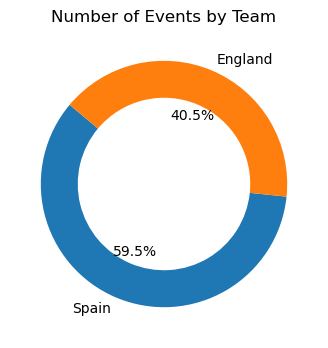

In [15]:
event_counts = df['teamName'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Number of Events by Team')
plt.show()

The donut chart shows the number of events logged for each team Spain have more recorded events

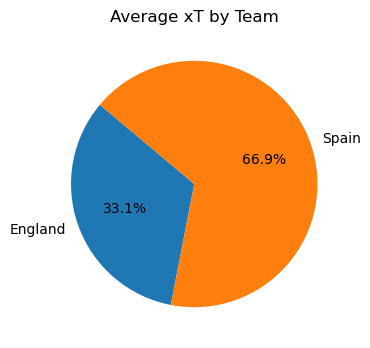

In [16]:
avg_xT_by_team = df.groupby('teamName')['xT'].mean()
plt.figure(figsize=(4, 4))
plt.pie(avg_xT_by_team, labels=avg_xT_by_team.index, autopct='%1.1f%%', startangle=140)
plt.title('Average xT by Team')
plt.show()


Higher xT value shows that team has created more contributions and chances

C:\Users\Sneha\AppData\Local\Temp\ipykernel_1568\836396314.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='position', y='percentage', data=avg_xt_by_position, ci=None)


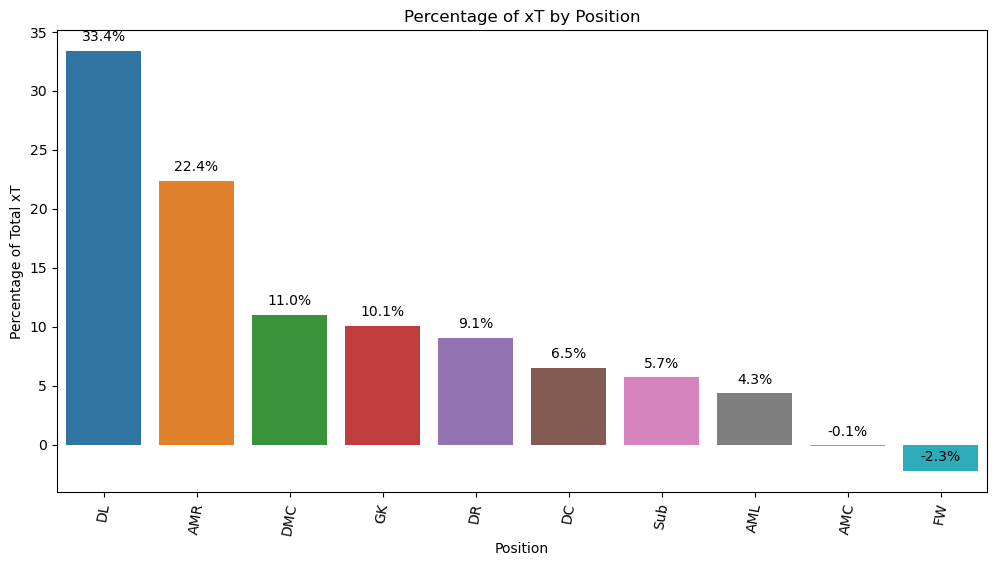

In [17]:

avg_xt_by_position = df.groupby('position')['xT'].mean().reset_index()

total_xt = avg_xt_by_position['xT'].sum()

avg_xt_by_position['percentage'] = (avg_xt_by_position['xT'] / total_xt) * 100

avg_xt_by_position = avg_xt_by_position.sort_values(by='percentage', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='position', y='percentage', data=avg_xt_by_position, ci=None)
plt.title('Percentage of xT by Position')
plt.xlabel('Position')
plt.ylabel('Percentage of Total xT')
plt.xticks(rotation=80)

for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., percentage), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=10)

plt.show()

The bar plot for xT by position shows that certain positions, such as left backs and attackind mids have higher xT values on average, indicating their significant role in the match.


C:\Users\Sneha\AppData\Local\Temp\ipykernel_1568\2450102989.py:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\Sneha\AppData\Local\Temp\ipykernel_1568\2450102989.py:55: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


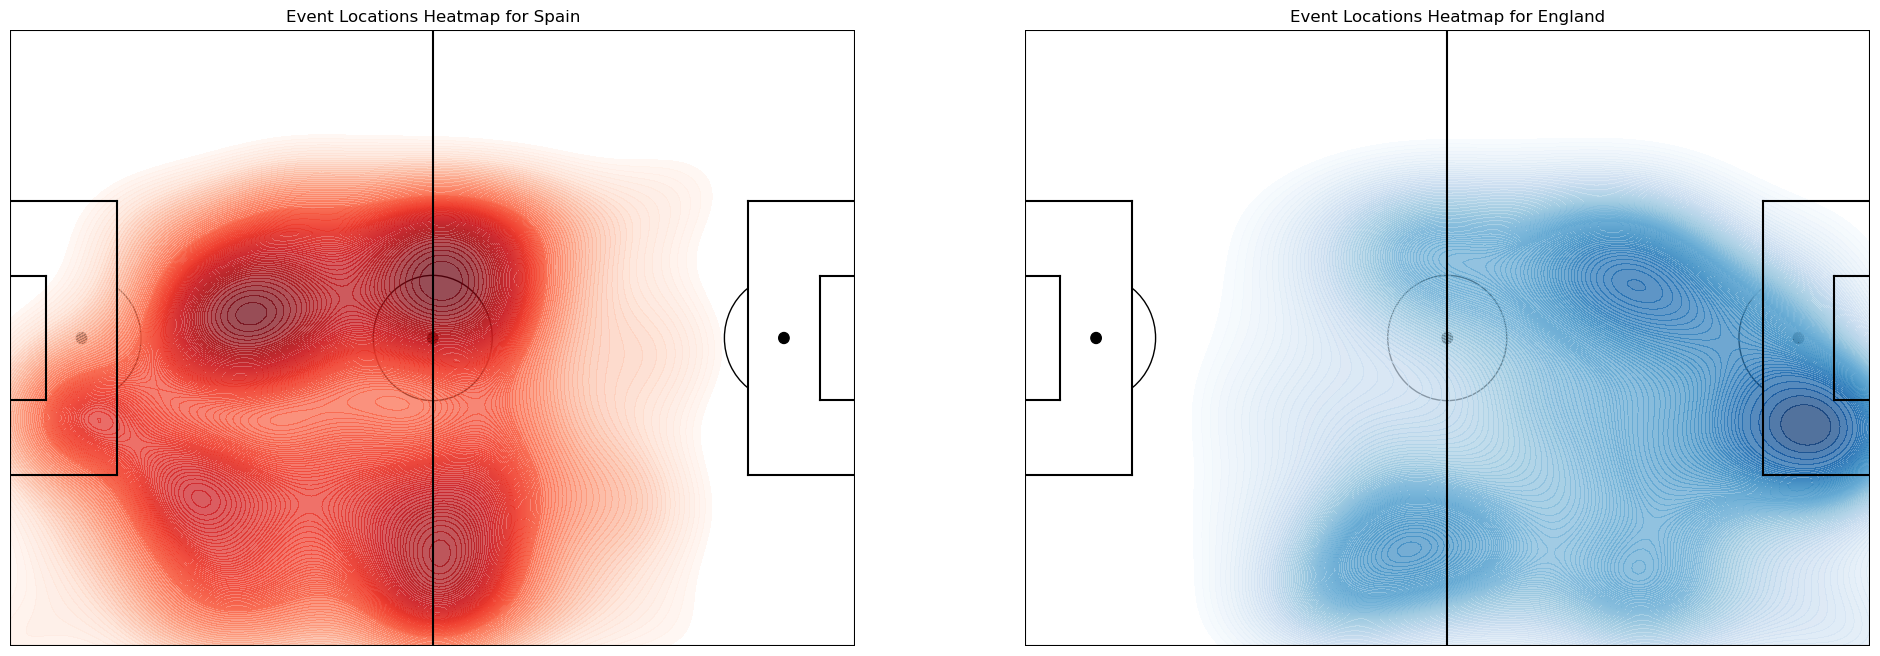

In [19]:
team_a = df[df['teamName'] == 'Spain']
team_b = df[df['teamName'] == 'England']

def create_pitch(ax):
    ax.plot([0, 0], [0, 90], color="black")
    ax.plot([0, 130], [90, 90], color="black")
    ax.plot([130, 130], [90, 0], color="black")
    ax.plot([130, 0], [0, 0], color="black")
    ax.plot([65, 65], [0, 90], color="black")
    ax.plot([16.5, 16.5], [65, 25], color="black")
    ax.plot([0, 16.5], [65, 65], color="black")
    ax.plot([16.5, 0], [25, 25], color="black")
    ax.plot([130, 113.5], [65, 65], color="black")
    ax.plot([113.5, 113.5], [65, 25], color="black")
    ax.plot([113.5, 130], [25, 25], color="black")
    ax.plot([0, 5.5], [54, 54], color="black")
    ax.plot([5.5, 5.5], [54, 36], color="black")
    ax.plot([5.5, 0], [36, 36], color="black")
    ax.plot([130, 124.5], [54, 54], color="black")
    ax.plot([124.5, 124.5], [54, 36], color="black")
    ax.plot([124.5, 130], [36, 36], color="black")
    centreCircle = plt.Circle((65, 45), 9.15, color="black", fill=False)
    centreSpot = plt.Circle((65, 45), 0.8, color="black")
    leftPenSpot = plt.Circle((11, 45), 0.8, color="black")
    rightPenSpot = plt.Circle((119, 45), 0.8, color="black")
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    leftArc = Arc((11, 45), height=18.3, width=18.3, angle=0, theta1=308, theta2=52, color="black")
    rightArc = Arc((119, 45), height=18.3, width=18.3, angle=0, theta1=128, theta2=232, color="black")
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    ax.set_xlim(0, 130)
    ax.set_ylim(0, 90)
    ax.axis('off')

fig, axs = plt.subplots(1, 2, figsize=(24, 8))

create_pitch(axs[0])
sns.kdeplot(
    x=team_a['x'], y=team_a['y'], 
    shade=True, alpha=0.7, n_levels=100, cmap='Reds', ax=axs[0]
)
axs[0].set_title('Event Locations Heatmap for Spain')

team_b_mirrored = team_b.copy()
team_b_mirrored['x'] = 130 - team_b_mirrored['x']

create_pitch(axs[1])
sns.kdeplot(
    x=team_b_mirrored['x'], y=team_b_mirrored['y'], 
    shade=True, alpha=0.7, n_levels=100, cmap='Blues', ax=axs[1]
)
axs[1].set_title('Event Locations Heatmap for England')

plt.show()

This graph shows a heatmap showing the areas on the pitch where the most events occur.

By analyzing the xT values of all the players we can see the players with the most expected threat or  with more contributions.

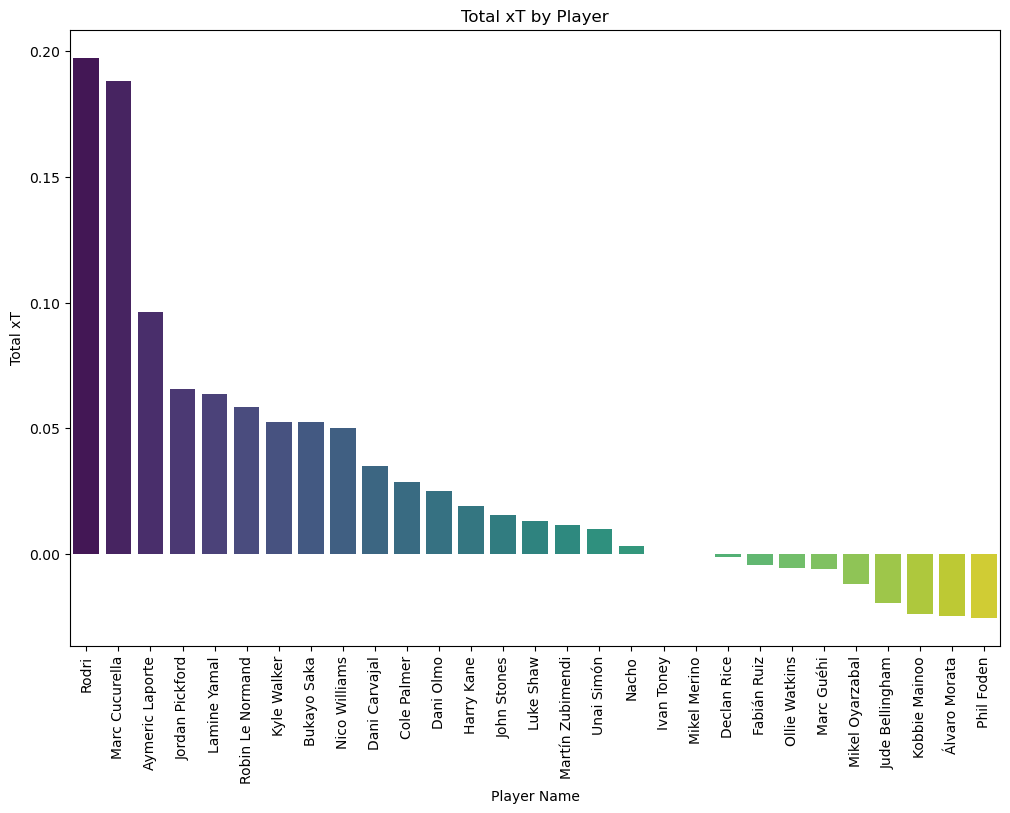

In [20]:
total_xT_by_player = df.groupby('name')['xT'].sum().reset_index()
total_xT_by_player = total_xT_by_player.sort_values(by='xT', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='xT', data=total_xT_by_player, palette='viridis')
plt.title('Total xT by Player')
plt.xlabel('Player Name')
plt.ylabel('Total xT')
plt.xticks(rotation=90)
plt.show()


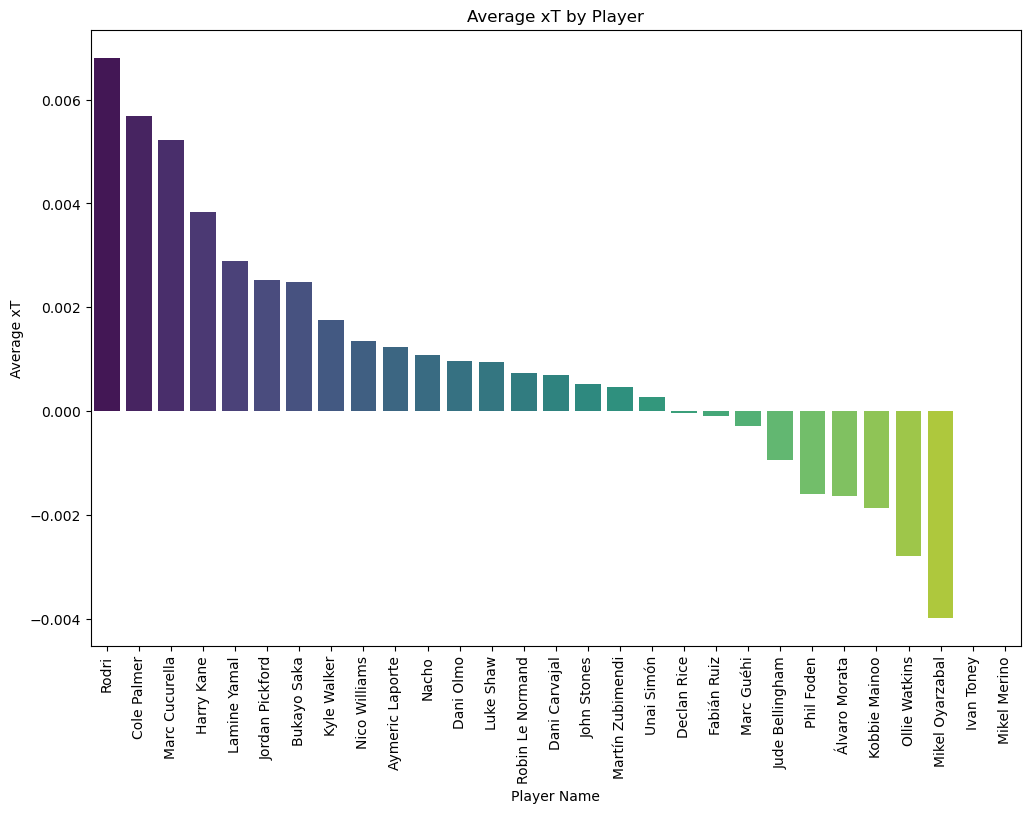

In [21]:
average_xT_by_player = df.groupby('name')['xT'].mean().reset_index()
average_xT_by_player = average_xT_by_player.sort_values(by='xT', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='xT', data=average_xT_by_player, palette='viridis')
plt.title('Average xT by Player')
plt.xlabel('Player Name')
plt.ylabel('Average xT')
plt.xticks(rotation=90)
plt.show()